# Лабораторная работа № 3.5

### Задача:

Вычислить определенный интеграл $F = \int\limits_{X_{0}}^{X_{1}} ydx$, методами прямоугольников,
трапеций, Симпсона с шагами $h_1 , h_2$ . Оценить погрешность вычислений, используя Метод Рунге-Ромберга.

In [1]:
import math
import numpy as np

$$ y(x) = \frac{x}{(2x+7)(3x+4)} $$

In [2]:
def y(x):
    return x / ((2 * x + 7) * (3 * x + 4))

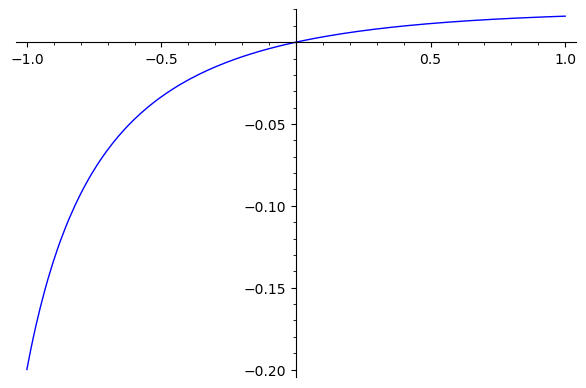

In [3]:
plot(y, (-1, 1))

### Численное интегрирование

$$ I = \int_{-1}^{1} \frac{x}{(2x+7)(3x+4)}dx $$

$$ I = \int_{-1}^{1} \frac{x}{(2x+7)(3x+4)}dx = \int_{-1}^{1} \left( \frac{\frac{7}{13}}{2x+7} - \frac{\frac{4}{13}}{(3x+4)} \right) dx = \left. \left( \frac{7}{26}ln|2x+7| - \frac{4}{39}ln|3x+4| \right) \right|_{-1}^{1} = 
\left. ln \left(\frac{(2x+7)^{\frac{7}{26}}}{(3x+4)^{\frac{4}{39}}} \right) \right|_{-1}^{1} = −0.04133027$$

In [4]:
class LagrangePolynomial():
    
    def __init__(self, Table):
        self.table = Table[:]
        
    def __call__(self, x):
        result = 0
        
        for i in range(len(self.table)):
            temp = 1
            
            for j in range(len(self.table)):
                if i != j:
                    temp *= (x - self.table[j][0]) / (self.table[i][0] - self.table[j][0])
            
            result += temp * self.table[i][1]
            
        return result

class Integral:
    
    def __init__(self, function):
        self.f = function
        
    def RectangleMethod(self, x1, x2, h, show = False):
        S = 0
        
        if show: G = plot(self.f, (x1, x2))
        
        for x in np.arange(x1, x2, h):
            S += self.f(x + h / 2)
            if show:
                L = LagrangePolynomial([(x + h / 2, self.f(x + h / 2))])
                G += plot(L, (x, x+h), fillcolor='red', fillalpha=.1, fill = True, color = 'red')
                G += line([(x + h / 2, 0), (x + h / 2, self.f(x + h / 2))], color = 'red', linestyle='-.', alpha = 0.3)
        
        if show: G.show()
        
        return S * h
    
    def TrapezoidMethod(self, x1, x2, h, show = False):
        S = 0
        
        if show: G = plot(self.f, (x1, x2))
        
        for x in np.arange(x1, x2, h):
            S += (self.f(x) + self.f(x + h)) / 2
            if show:
                L = LagrangePolynomial([(x, self.f(x)), (x + h, self.f(x + h))])
                G += plot(L, (x, x+h), fillcolor='red', fillalpha=.1, fill = True, color = 'red')
                G += line([(x, 0), (x, self.f(x))], color = 'red', linestyle='-.', alpha = 0.3)
                G += line([(x + h, 0), (x + h, self.f(x + h))], color = 'red', linestyle='-.', alpha = 0.3)
        
        if show: G.show()
        
        return S * h
    
    def SimpsonMethod(self, x1, x2, h, show = False):
        S = 0
        
        if show: G = plot(self.f, (x1, x2))
            
        for x in np.arange(x1, x2, 2 * h):
            S += (self.f(x) + 4 * self.f(x + h) + self.f(x + 2 * h))
            if show:
                L = LagrangePolynomial([(x, self.f(x)), (x + h, self.f(x + h)), (x + 2 * h, self.f(x + 2 * h))])
                G += plot(L, (x, x+2*h), fillcolor='red', fillalpha=.1, fill = True, color = 'red')
                G += line([(x, 0), (x, self.f(x))], color = 'red', linestyle='-.', alpha = 0.3)
                G += line([(x + h, 0), (x + h, self.f(x + h))], color = 'red', linestyle='-.', alpha = 0.3)
                G += line([(x+2*h, 0), (x+2*h, self.f(x+2*h))], color = 'red', linestyle='-.', alpha = 0.3)
        
        if show: G.show()
        
        return S * h / 3.0

In [5]:
Iy = Integral(y)
h1 = 0.5
h2 = 0.25

#### Встроенный метод

In [6]:
x = var("x")
f(x) = x / ((2*x+7) * (3*x+4))
integrate(f, x, -1, 1).n()

-0.0413302721730513

#### Метод прямоугольников

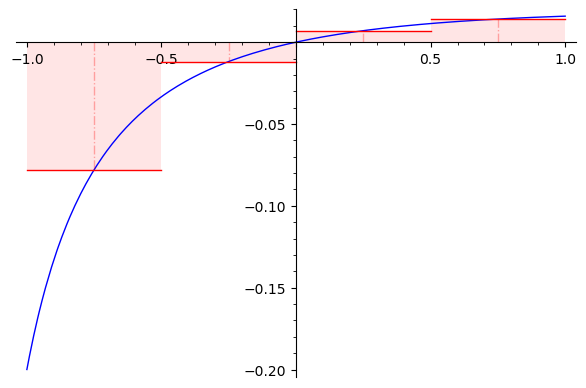

-0.03431060326511625

In [7]:
IRM1 = Iy.RectangleMethod(-1, 1, h1, True)
IRM1

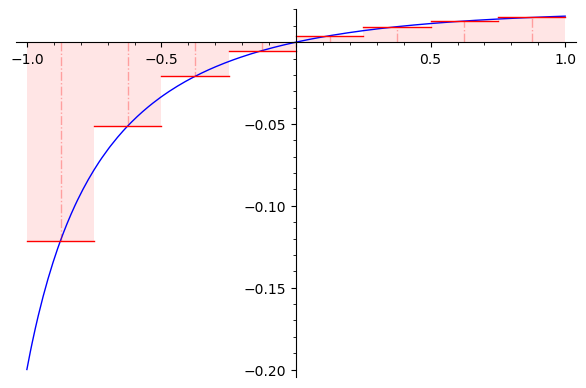

-0.039242405208091885

In [8]:
IRM2 = Iy.RectangleMethod(-1, 1, h2, True)
IRM2

In [9]:
print(f"eps: {(IRM2 - IRM1) / (2**2 - 1)}")
print(f"I = {IRM2 + (IRM2 - IRM1) / (2**2 - 1)}")
integrate(f, x, -1, 1).n() - (-0.039242405208091885)

eps: -0.0016439339809918782
I = -0.04088633918908376


-0.00208786696495941

#### Метод трапеций

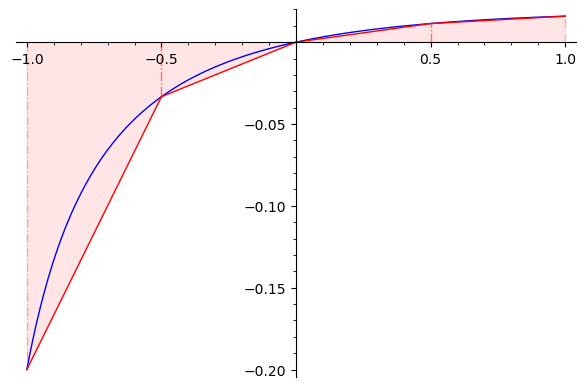

-0.05701659451659452

In [10]:
ITM1 = Iy.TrapezoidMethod(-1, 1, h1, True)
ITM1

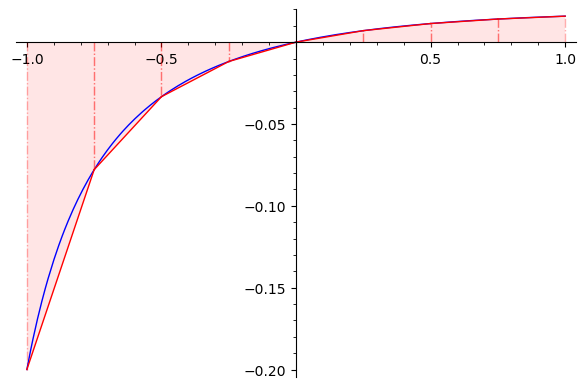

-0.045663598890855375

In [11]:
ITM2 = Iy.TrapezoidMethod(-1, 1, h2, True)
ITM2

In [12]:
print(f"eps: {(ITM2 - ITM1) / (2**2 - 1)}")
print(f"I = {ITM2 + (ITM2 - ITM1) / (2**2 - 1)}")

eps: 0.003784331875246382
I = -0.04187926701560899


#### Метод Симпсона

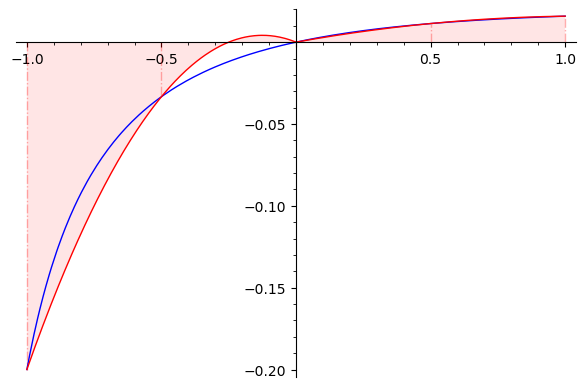

-0.04533429533429534

In [13]:
ISM1 = Iy.SimpsonMethod(-1, 1, h1, True)
ISM1

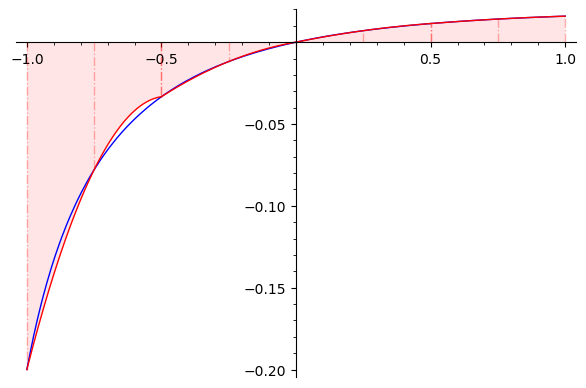

-0.04187926701560901

In [14]:
ISM2 = Iy.SimpsonMethod(-1, 1, h2, True)
ISM2

In [15]:
print(f"eps: {(ISM2 - ISM1) / (2**4 - 1)}")
print(f"I = {ISM2 + (ISM2 - ISM1) / (2**4 - 1)}")

eps: 0.00023033522124575508
I = -0.041648931794363256
